Домашнее задание
Сбор и разметка данных (семинары)
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

2. Загрузите датасет в pandas DataFrame под названием df.

In [1]:
# У нас есть 2 таблицы - test и train, видимо для машинного обучения. Берем только таблицу train, так как в test отсутствует много значений
# SalePrice
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('train.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Выполните предварительную обработку данных, выполнив следующие шаги:

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

In [3]:
# Посмотрим в целом на данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Посмотрим на пустые значения в таблице
pd.set_option('display.max_rows', None)
df.isnull().sum()[df.isnull().sum().gt(0)]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Например, отсутствуют данные по median_LotFrontage (Длина улицы в линейных футах, соединенной с объектом недвижимости)
# Посчитаем медианное значение
median_LotFrontage = df['LotFrontage'].median()
median_LotFrontage

69.0

In [6]:
# и заполним пустые значения LotFrontage медианным
df['LotFrontage'] = df['LotFrontage'].fillna(median_LotFrontage)

In [7]:
# проверим, что теперь в LotFrontage заполнены все значения
df.LotFrontage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [8]:
# Заполним пропущенное значение в столбце Electrical наиболее распространенным значением
mode_Electrical = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(mode_Electrical)
mode_Electrical

'SBrkr'

In [9]:
# удалим колонки, в которых отсутствует много данных (Alley, PoolQC, Fence, MiscFeature)
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

b. Проверьте и обработайте любые дублирующиеся строки в датасете.

In [10]:
# Проверим данные на наличие дубликатов
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
# Дубликатов нет

c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [12]:
# Собственно, преобразовывать нечего - текстовые значени содержатся в объектах, числовае в int64 и float64

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 

a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

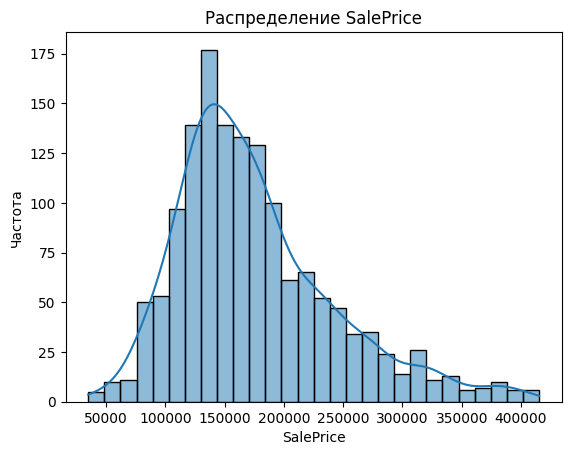

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение графика распределения SalePrice
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()


In [23]:
# Исследуем выбросы
# Вычислим Z-score для столбца SalePrice

z = np.abs(stats.zscore(df['SalePrice']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z > threshold]

In [24]:
df['SalePrice'].mean()

180921.19589041095

In [ ]:
outliers

In [25]:
# Замена выбросов медианным значением
df.loc[z > threshold, 'SalePrice'] = df['SalePrice'].median()

b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 

In [26]:
df['SalePrice'].mean()

175650.97465753424

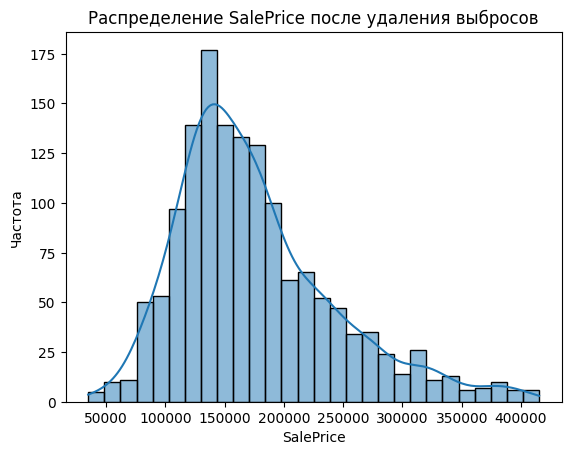

In [29]:
# Построение графика распределения SalePrice после удаления выбросов
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Распределение SalePrice после удаления выбросов')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

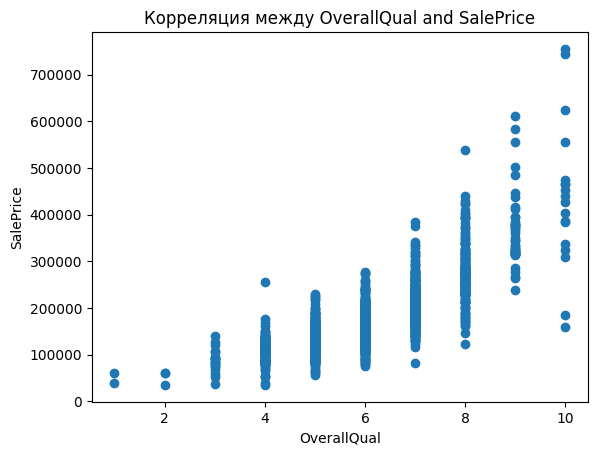

Корреляция между OverallQual и SalePrice: 0.7909816005838051


In [15]:
# Построим график корреляции между OverallQual and SalePrice
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.title('Корреляция между OverallQual and SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Вычисление корреляции
correlation = df['OverallQual'].corr(df['SalePrice'])
print('Корреляция между OverallQual и SalePrice:', correlation)

Корреляция присутствует.

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

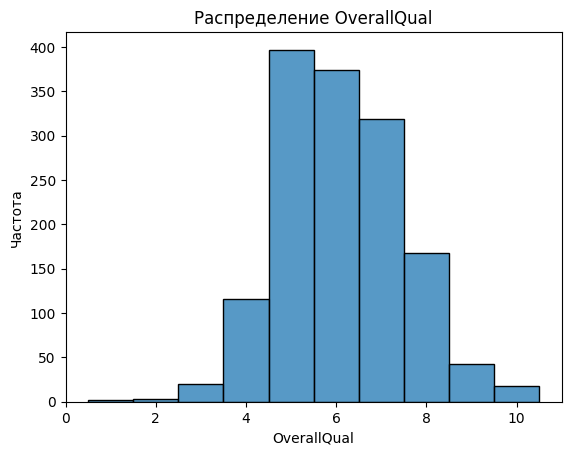

In [16]:
# Построение графика распределения OverallQual
sns.histplot(data=df, x='OverallQual', discrete=True)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

Распределение нормальное, вылетов нет.

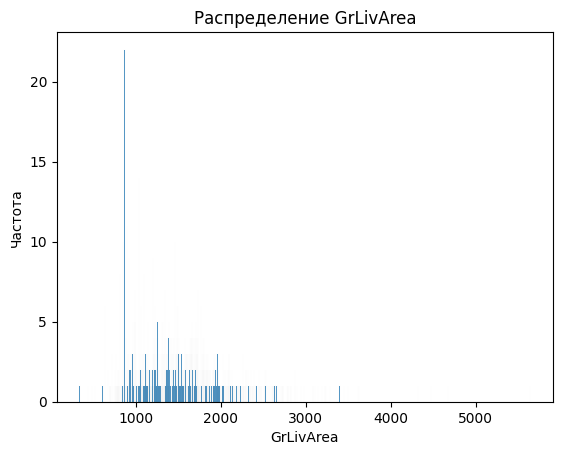

In [17]:
# Построение графика распределения GrLivArea
sns.histplot(data=df, x='GrLivArea', discrete=True)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [18]:
df.to_csv('cleaned_house_prices.csv', index=False)